#Capston Project -End to End Machine Learning

**SUPERVISED - REGRESSION**

**Project** - Yes bank stock closing price prediction

**NAME : Chirag Pandey**

**Project Summary -**


Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.

**GitHub Link -**


**Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

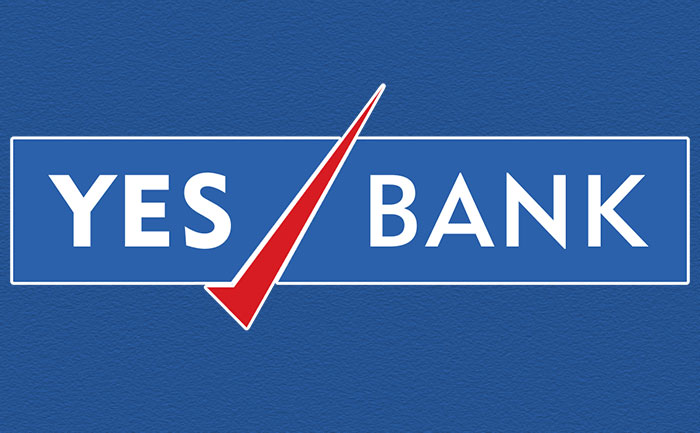

**Project Type - Linear Regression**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [ ]:
from google.colab import files
upload=files.upload()


Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices (1).csv


In [ ]:
df=pd.read_csv('data_YesBank_StockPrices.csv')

#**Description Of Data**

#Get a basic understanding of the data.

In [ ]:
#head
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#length
len(df)

185

In [ ]:
# rows and columns
df.shape

(185, 5)

In [ ]:
#describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#**Data Wrangling**

In [ ]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#change data type of Date column object to datetime
df['Date'] =pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
#check missing values
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
#check duplicates
df.duplicated().sum()

0

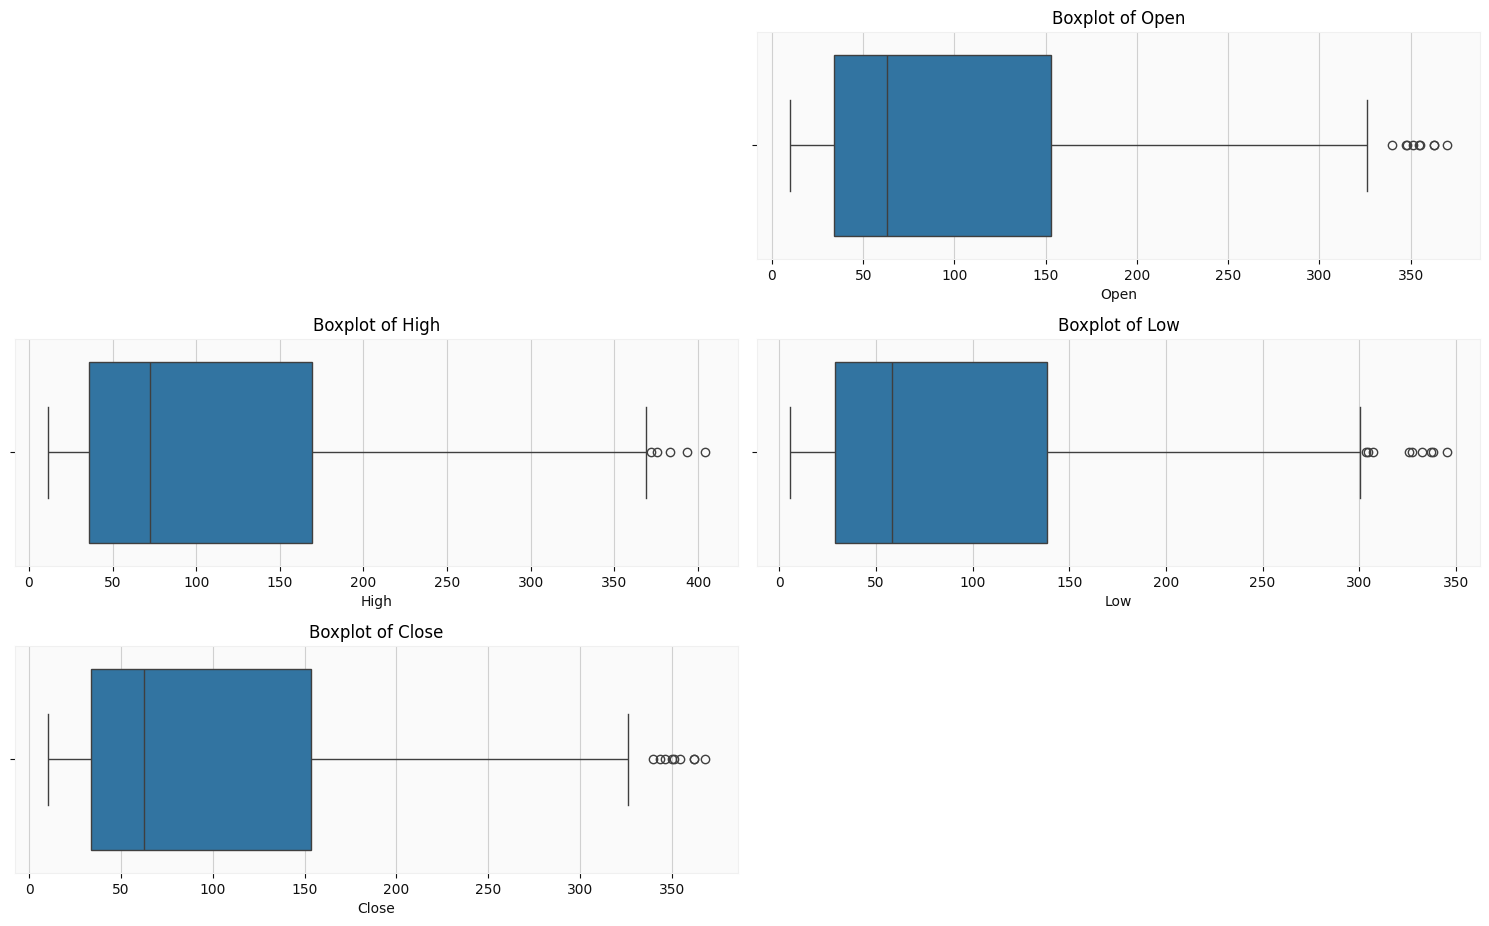

In [ ]:
 #check outliers using box plot of every column

# Plotting boxplots for each column to visualize outliers
plt.figure(figsize=(15,12))
for i,col in enumerate(df.columns):
  if df[col].dtype != 'datetime64[ns]': # Check if the column is not a datetime column
    plt.subplot(4, 2, i+1)  # Adjust subplot grid based on the number of columns
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:

# in percent
for col in df.columns:
  if df[col].dtype != 'datetime64[ns]':
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_percent = (len(outliers)/len(df))*100
    print(f"Outliers in {col}: {outliers_percent:.2f}%")




Outliers in Open: 4.86%
Outliers in High: 2.70%
Outliers in Low: 4.86%
Outliers in Close: 4.86%


#**EDA (Exploratory Data Analysis)**


**Univariate Analysis**

In [ ]:
#list of every column
col=list(df.columns)
col

['Date', 'Open', 'High', 'Low', 'Close']

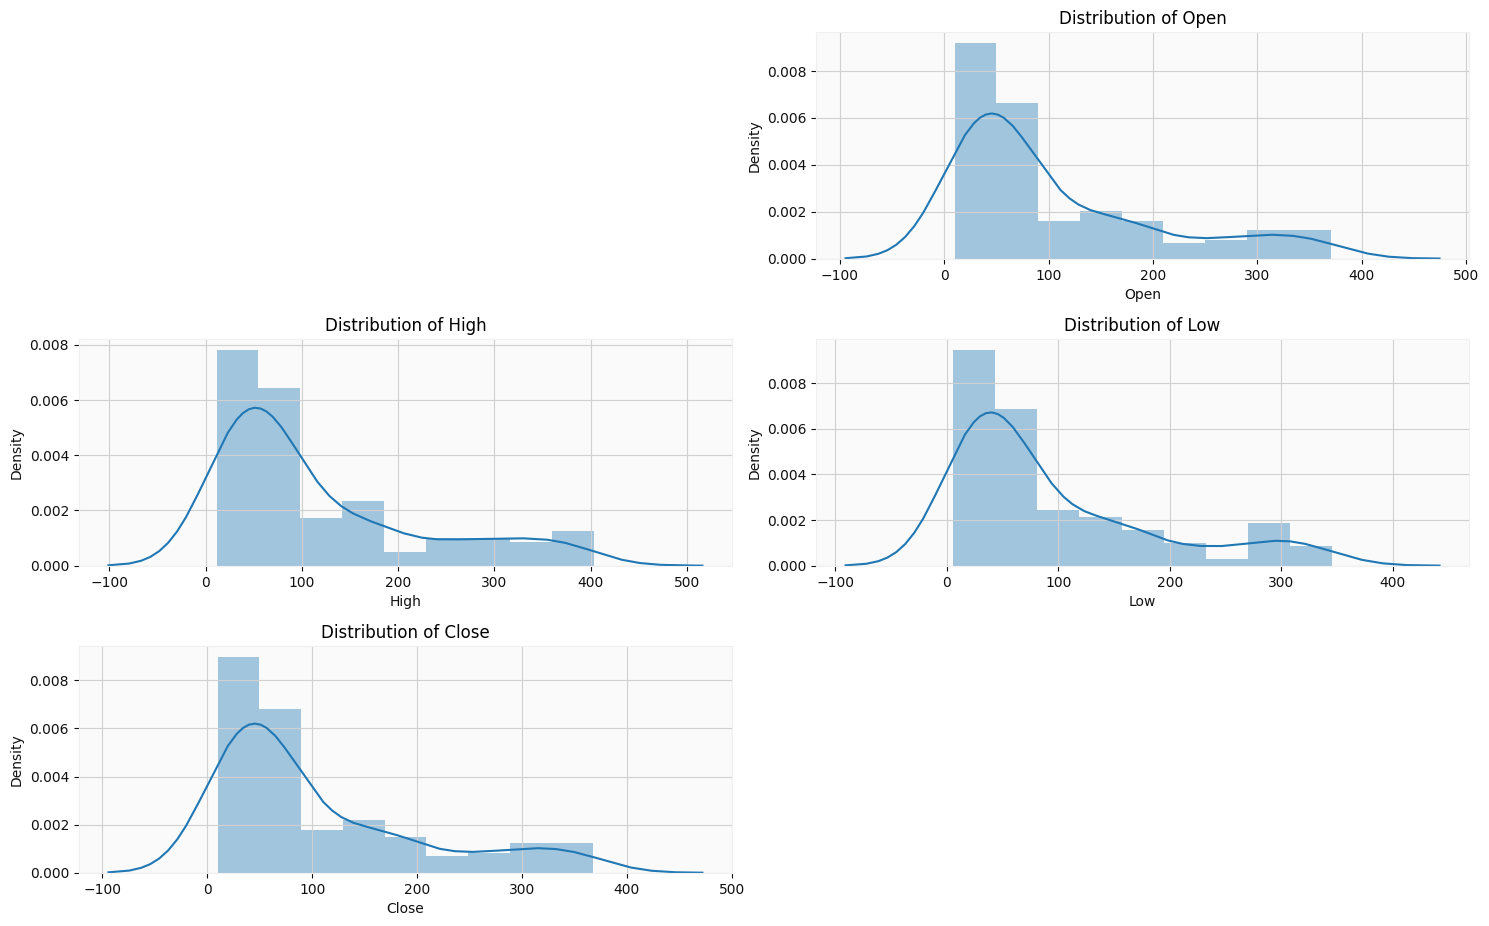

In [ ]:
#plot the distribution of each column
plt.figure(figsize=(15,12))
for i,col in enumerate(df.columns):
  if df[col].dtype != 'datetime64[ns]':
    plt.subplot(4,2,i+1)
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Bivariate Analysis**

*Analyze the relationship between the 'Close' price and other features.*

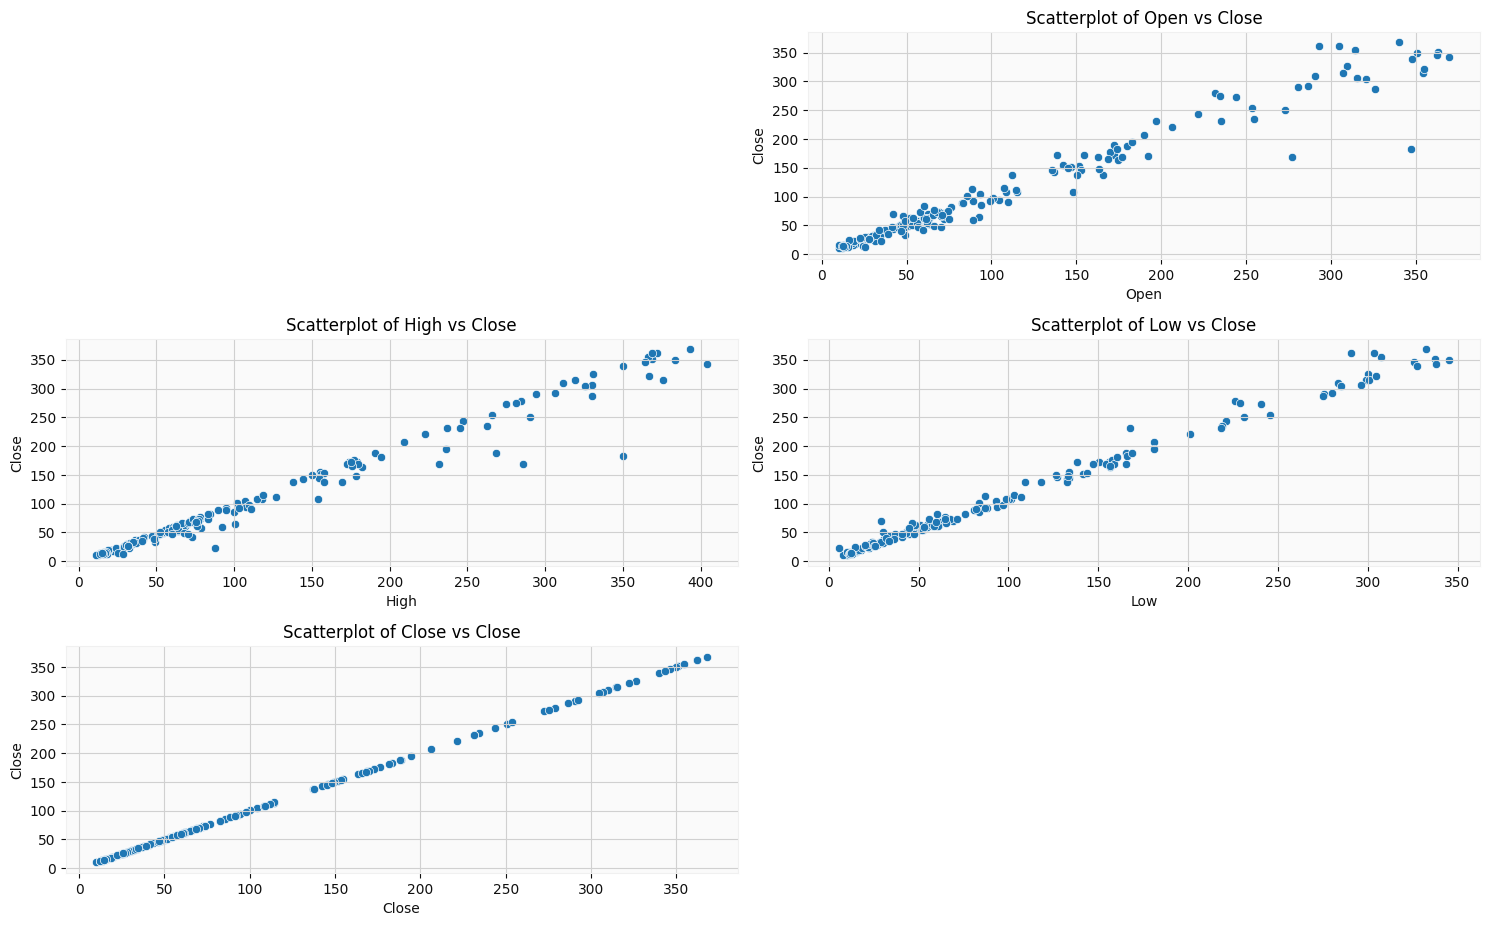

In [ ]:

plt.figure(figsize=(15,12))
for i,col in enumerate(df.columns):
  if df[col].dtype != 'datetime64[ns]':
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=df[col],y=df['Close'])
    plt.title(f"Scatterplot of {col} vs Close")
plt.tight_layout()
plt.show()

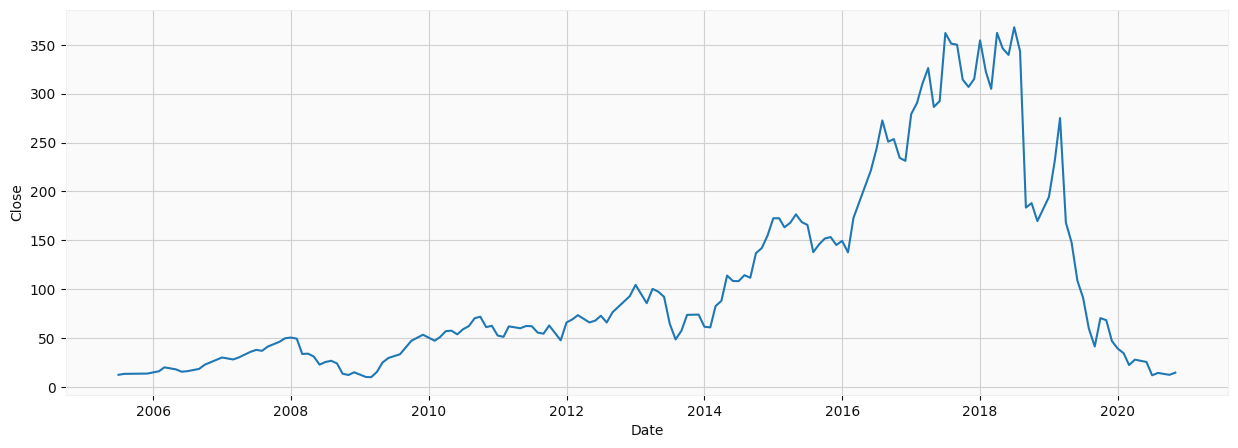

In [ ]:
#with date
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
!pip install mplfinance

import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']]

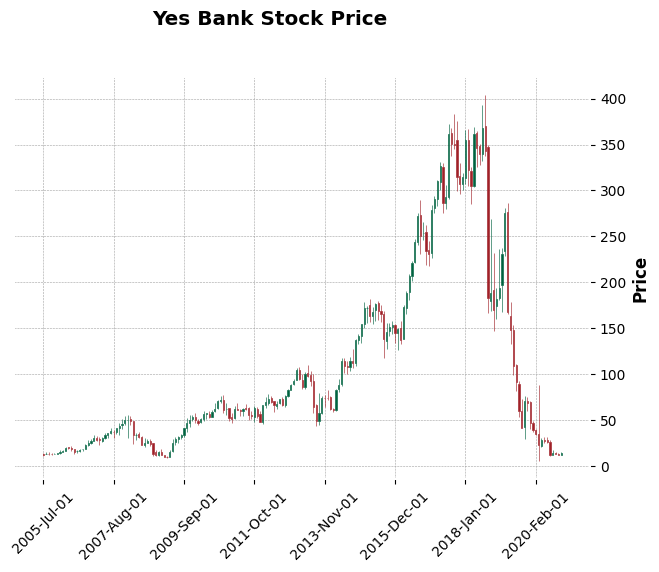

In [ ]:
#candelstick chart
mpf.plot(df_candle, type='candle', style='charles', title='Yes Bank Stock Price')


**Multivariate Analysis**

*Plot a heatmap to visualize correlations.*

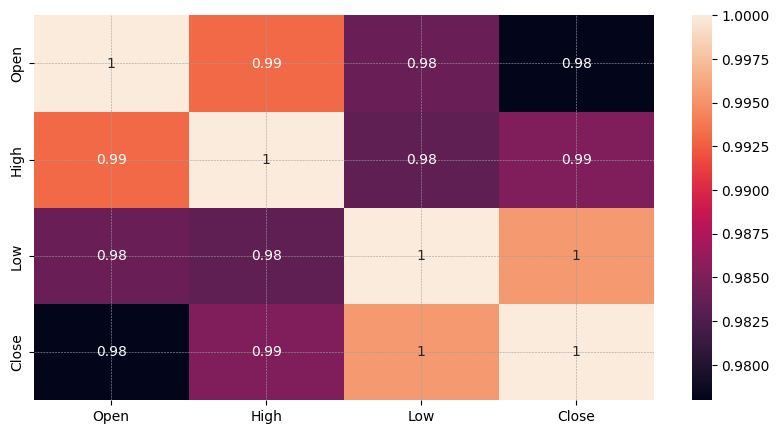

In [ ]:
#Plot a heatmap to visualize correlations.
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

**PowerTransformer** -
*The PowerTransformer is a preprocessing tool in the scikit-learn library used for feature transformation. It aims to make data more Gaussian-like by stabilizing variance and minimizing skewness. This is often beneficial for machine learning algorithms that assume or perform better with normally distributed data.*

In [ ]:
pw = PowerTransformer(method='box-cox',standardize=True)

In [ ]:
cf= df[list(df.columns)]

In [ ]:
df['Close']

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41
...,...
2020-07-01,11.95
2020-08-01,14.37
2020-09-01,13.15


In [ ]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [ ]:
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [ ]:
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

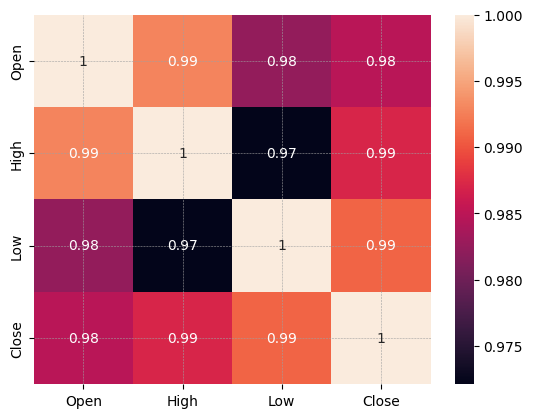

In [ ]:
sns.heatmap(kf.corr(),annot=True)

In [ ]:
col = list(kf.columns)

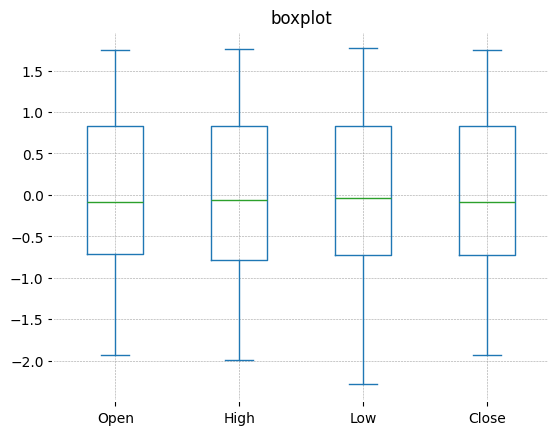

In [ ]:
ax = kf[col].plot(kind='box', title='boxplot')

plt.show()

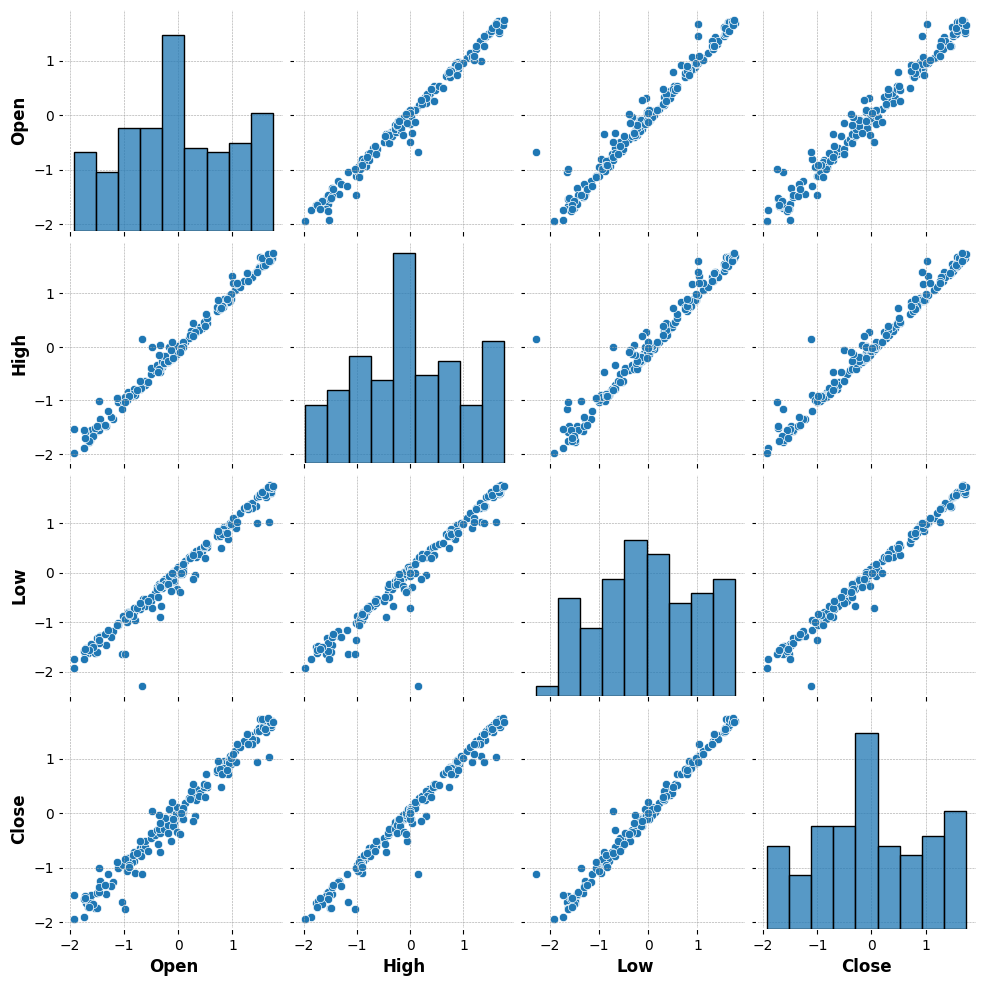

In [ ]:
#pairplot
sns.pairplot(kf)

#**Data Preprocessing**

**Power Transformation to Reduce Multicollinearity**

Transform the features using PowerTransformer.

In [ ]:
#head
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [ ]:
#dependent and independent variable
dependent_variable = 'Close'
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [ ]:
x=df[independent_variable].values

In [ ]:
y=df[dependent_variable].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#**Linear Regression**

In [ ]:
#linar regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#y_predict
y_pred=reg.predict(x_test)

In [ ]:
#score
linear_r2=r2_score(y_test,y_pred)
linear_r2

0.9930815866308079

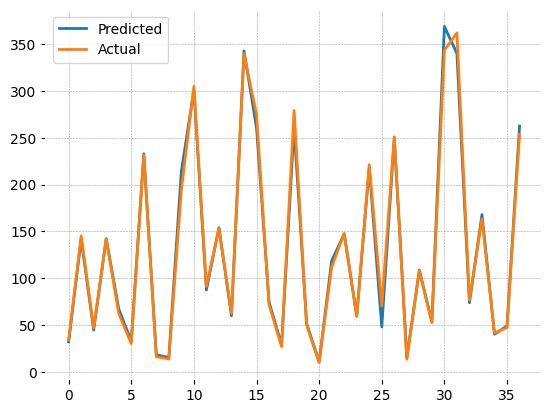

In [ ]:
#plot
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#**K-Nearest Neighbors (KNN):**

In [ ]:
#knn
knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)

In [ ]:
#model fit
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
#best param
model.best_params_

{'n_neighbors': 2}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
#fit
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
#predict
knn_pred = knn.predict(x_test)

In [ ]:
#score
r2_knn = r2_score(y_test,knn_pred)
r2_knn

0.9931154527450295

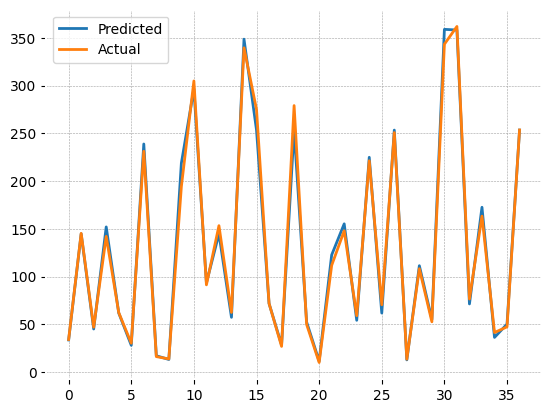

In [ ]:
#plot
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#**Random Forest**

In [ ]:
#Random forest
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)

In [ ]:
#train model
rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [ ]:
#best paramas
rf_model.best_params_

{'criterion': 'squared_error', 'max_features': None, 'n_estimators': 300}

In [ ]:
rf = RandomForestRegressor(criterion= 'squared_error', max_features= None, n_estimators= 300)

In [ ]:
#fit
rf.fit(x_train,y_train)

RandomForestRegressor(max_features=None, n_estimators=300)

In [ ]:
#predict
rf_predict_ = rf.predict(x_test)

In [ ]:
#score
rf_r2 = r2_score(y_test,rf_predict_)
rf_r2

0.9850540073717784

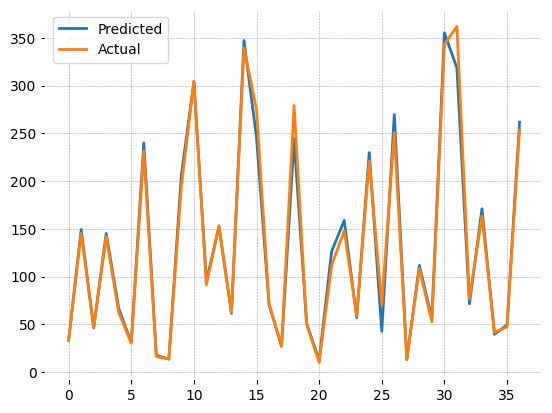

In [ ]:
#plot
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#**Ridge Regression**

In [ ]:
#ridge regression
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_

{'alpha': 100}

In [ ]:
ridge =Ridge(alpha= 100)

In [ ]:
#fit
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [ ]:
#predict
y_pred_ridge = ridge.predict(x_test)

In [ ]:
#score
ridge_r2 = r2_score(y_test,y_pred_ridge)
ridge_r2

0.9930447012730753

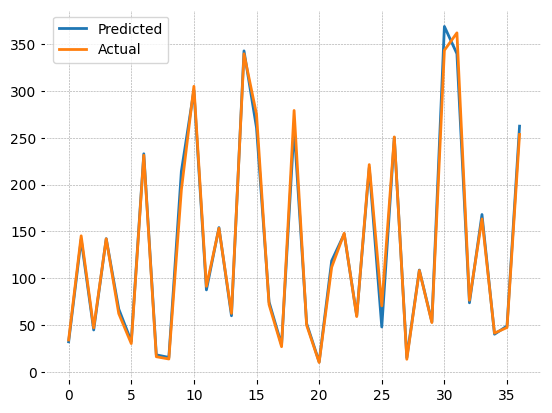

In [ ]:
#graph
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#**Lasso Regression**

In [ ]:
#lasso
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)# train model

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#Best params
lasso_regressor.best_params_

{'alpha': 1.6}

In [ ]:

lasso =Lasso(alpha= 1.6)

In [ ]:
#fit
lasso.fit(x_train,y_train)

Lasso(alpha=1.6)

In [ ]:
#predict
lasso_predict = lasso.predict(x_test)

In [ ]:
#score
lasso_r2 = r2_score(y_test,lasso_predict)
lasso_r2

0.9928248945871775

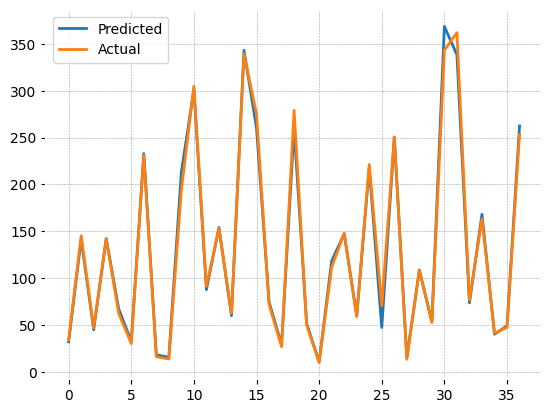

In [ ]:
#graph
plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#**ElasticNet**

In [ ]:
#ElasticNet
elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
#best params
elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [ ]:
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)

In [ ]:
#fit
elastic.fit(x_train,y_train)

ElasticNet(alpha=5, l1_ratio=0.1)

In [ ]:
#predict
elastic_predict = elastic.predict(x_test)

In [ ]:
#score
elastic_r2= r2_score(y_test,elastic_predict)
elastic_r2

0.9927539902081145

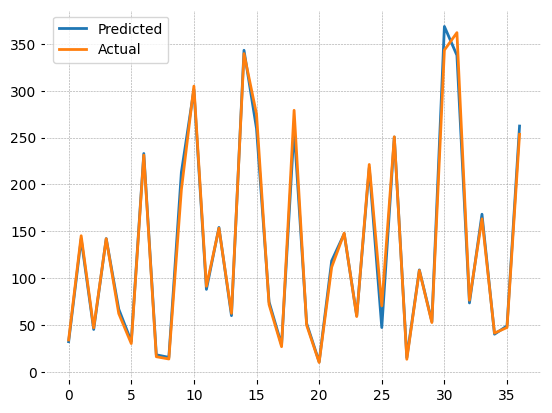

In [ ]:
#plot
plt.plot(elastic_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#**Evaluation and Improvement of Model**

In [ ]:
#Compare Model Performance:
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})



In [ ]:
#sort
Report.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [ ]:
Report

,model,r2_score
4,knn regression,0.993115
0,linear regression,0.993082
1,ridge regression,0.993045
2,lasso regression,0.992825
3,elastic net regression,0.992754
5,RandomForest Regression,0.985054


**Feature Importance:**

For Random Forest and other applicable models, determine feature importance.

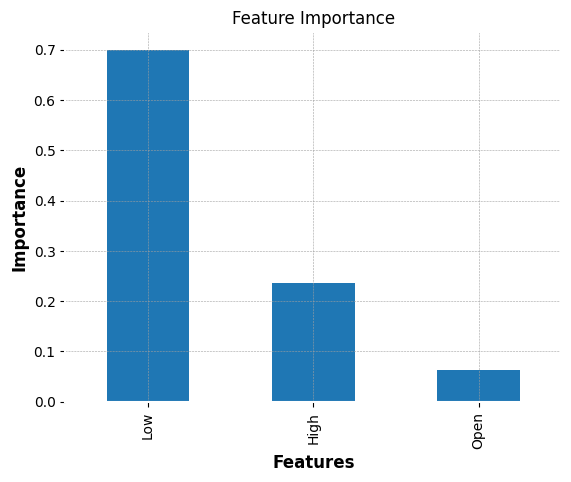

In [ ]:
# Assuming you have already run GridSearchCV and fitted the model
rf_best = rf_model.best_estimator_

# Extract feature importances
feature_importance = pd.Series(rf_best.feature_importances_, index=independent_variable).sort_values(ascending=False)

# Plot feature importances
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

#**Conclusions Drawn :**

In [ ]:
#Summarize Findings:
print("Conclusions:")
print("- The dataset contains monthly stock prices of Yes Bank since its inception.")
print("- There is a significant impact on stock prices due to the fraud case involving Rana Kapoor in 2018.")
print("- No null values or duplicate data were found.")
print("- Despite outliers, they were retained to avoid data loss.")
print("- Applied power transformation to handle positively skewed distribution.")
print("- High correlation between dependent and independent variables indicates a good prediction potential.")
print("- High multicollinearity among independent variables due to small dataset.")
print("- KNN Regressor performed the best with an R2 score of 0.993115.")


Conclusions:
- The dataset contains monthly stock prices of Yes Bank since its inception.
- There is a significant impact on stock prices due to the fraud case involving Rana Kapoor in 2018.
- No null values or duplicate data were found.
- Despite outliers, they were retained to avoid data loss.
- Applied power transformation to handle positively skewed distribution.
- High correlation between dependent and independent variables indicates a good prediction potential.
- High multicollinearity among independent variables due to small dataset.
- KNN Regressor performed the best with an R2 score of 0.993115.


In [ ]:
#Project Utility for Stakeholders:
print("Utility for Stakeholders:")
print("- Accurate prediction of closing prices can assist investors in making informed decisions.")
print("- Helps in understanding the impact of major events on stock prices.")
print("- Provides a basis for further financial analysis and investment strategies.")


Utility for Stakeholders:
- Accurate prediction of closing prices can assist investors in making informed decisions.
- Helps in understanding the impact of major events on stock prices.
- Provides a basis for further financial analysis and investment strategies.


                                                          ** Thank you**